<a href="https://colab.research.google.com/github/AyusheeMittal/legendary-guide/blob/master/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential, Model
from keras.layers.convolutional import Convolution2D, MaxPooling2D, AveragePooling2D
from keras.layers import Activation, Flatten, Dense, Dropout, DepthwiseConv2D, Input, SeparableConv2D, Conv2D, Add
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10 
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_rows, img_cols, img_channels =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

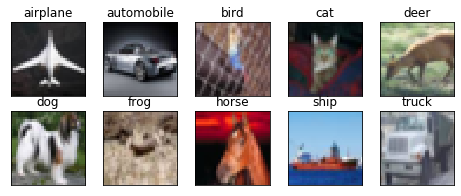

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [7]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)       

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  del sys.path[0]





Epoch 1/50





390/390 [==============================] - 10s 25ms/step - loss: 1.8395 - acc: 0.2928 - val_loss: 1.5020 - val_acc: 0.4350
Epoch 2/50
390/390 [==============================] - 7s 17ms/step - loss: 1.3433 - acc: 0.5130 - val_loss: 1.1156 - val_acc: 0.5972
Epoch 3/50
390/390 [==============================] - 7s 17ms/step - loss: 1.1333 - acc: 0.6009 - val_loss: 0.9938 - val_acc: 0.6516
Epoch 4/50
390/390 [==============================] - 7s 17ms/step - loss: 0.9823 - acc: 0.6592 - val_loss: 0.8330 - val_acc: 0.7093
Epoch 5/50
390/390 [==============================] - 7s 17ms/step - loss: 0.8811 - acc: 0.6944 - val_loss: 0.7757 - val_acc: 0.7292
Epoch 6/50
390/390 [==============================] - 7s 17ms/step - loss: 0.7947 - acc: 0.7286 - val_loss: 0.7453 - val_acc: 0.7391
Epoch 7/50
390/390 [==============================] - 7s 17ms/step - loss: 0.7442 - acc: 0.7447 - val_loss: 0.7005 - val_acc: 0.7607
Epoch 8/50
390/390 [==============================] - 7s 18m

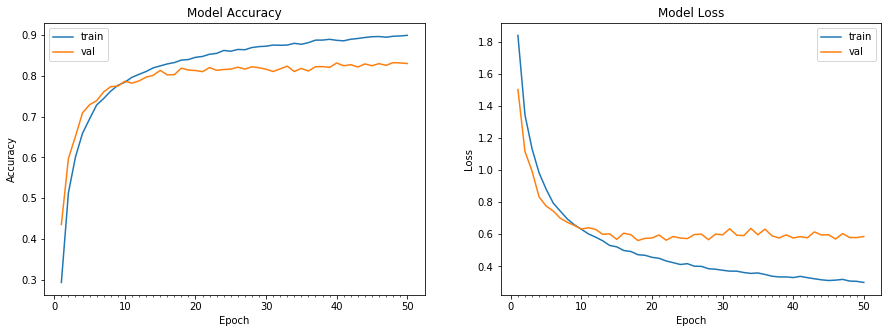

Accuracy on test data is: 83.03


In [9]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

**Code Added as a part of Assignment3 to beat the previous validation accuracy**

In [10]:
# Define the model
model_input = Input((32,32,3))
model2 = SeparableConv2D(40, (3,3), padding='same') (model_input)  #Output:32,32,40   RF:3
model2 = BatchNormalization() (model2)
model2 = Activation('relu') (model2)

model2 = SeparableConv2D(40, (3,3)) (model2)  #Output:30,30,40   RF:5
model2 = BatchNormalization() (model2)
model2 = Activation('relu') (model2)

model = SeparableConv2D(40, (3,3), padding='same') (model2)  #Output:30,30,40   RF:7
model2 = BatchNormalization() (model2)
model2 = Activation('relu') (model2)

model2 = MaxPooling2D() (model2)  #Output:15,15,40   RF:8
model2 = Dropout(0.15) (model2)

model2 = SeparableConv2D(80, (3,3), padding='same') (model2)  #Output:15,15,80   RF:12
model2 = BatchNormalization() (model2)
model2 = Activation('relu') (model2)

model2 = SeparableConv2D(80, (3,3)) (model2)  #Output:13,13,80   RF:16
model2 = BatchNormalization() (model2)
model2 = Activation('relu') (model2)

model2 = SeparableConv2D(80, (3,3), padding='same') (model2)  #Output:13,13,80   RF20
model2 = BatchNormalization() (model2)
model2 = Activation('relu') (model2)

model2 = MaxPooling2D() (model2)  #Output:6,6,80   RF:22
model2 = Dropout(0.15) (model2)

model2 = SeparableConv2D(160, (3,3), padding='same') (model2)  #Output:6,6,160   RF:30
model2 = BatchNormalization() (model2)
model2 = Activation('relu') (model2)

model2 = SeparableConv2D(160, (3,3)) (model2)  #Output:4,4,160   RF:38
model2 = BatchNormalization() (model2)
model2 = Activation('relu') (model2)

model2 = SeparableConv2D(160, (3,3), padding='same') (model2) #Output:4,4,160   RF:46
model2 = BatchNormalization() (model2)
model2 = Activation('relu') (model2)

model2 = MaxPooling2D() (model2)  #Output:2,2,160   RF:50
model2 = Dropout(0.15) (model2)

model2 = SeparableConv2D(10, (2,2)) (model2)  #Output:1,1,10   RF:58
model2 = Flatten() (model2)
model2 = Activation('softmax') (model2)

model2 = Model(inputs = model_input, outputs = model2)

# Compile the model
def scheduler(epoch, lr):
  return round(0.003 * 1/(1+0.319 * epoch),10)
model2.compile(optimizer=Adam(0.003), loss='categorical_crossentropy', metrics=['accuracy'])
model2.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
separable_conv2d_1 (Separabl (None, 32, 32, 40)        187       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 40)        160       
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 40)        0         
_________________________________________________________________
separable_conv2d_2 (Separabl (None, 30, 30, 40)        2000      
_________________________________________________________________
batch_normalization_2 (Batch (None, 30, 30, 40)        160       
_________________________________________________________________
activation_10 (Activation)   (None, 30, 30, 40)        0  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=1562, epochs=50)`
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
1562/1562 [==============================] - 39s 25ms/step - loss: 1.4296 - acc: 0.4853 - val_loss: 1.8378 - val_acc: 0.4409
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
1562/1562 [==============================] - 37s 23ms/step - loss: 1.0507 - acc: 0.6279 - val_loss: 0.9639 - val_acc: 0.6652
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
1562/1562 [==============================] - 36s 23ms/step - loss: 0.9049 - acc: 0.6820 - val_loss: 1.0389 - val_acc: 0.6516
Epoch 4/50

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
1562/1562 [==============================] - 37s 23ms/step - loss: 0.8182 - acc: 0.7139 - val_loss: 1.0685 - val_acc: 0.6456
Epoch 5/50

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
1562/1562 [==============================] - 37s 23ms/step - loss: 0.7668 - a

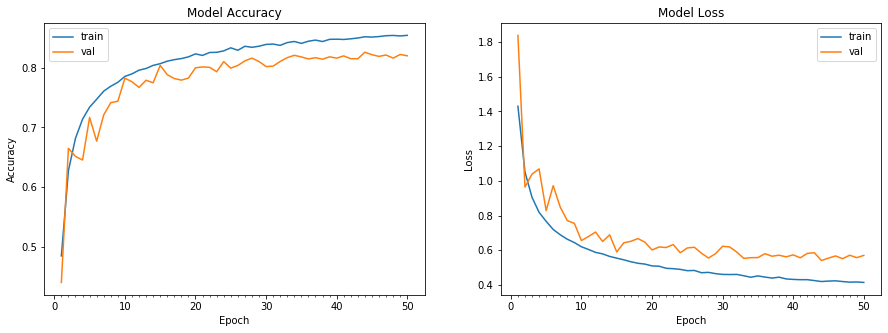

Accuracy on test data is: 81.99


In [11]:
datagen2 = ImageDataGenerator(zoom_range=[0.75,1], horizontal_flip=True)


# train the model
start = time.time()
# Train the model
model_info2 = model2.fit_generator(datagen2.flow(train_features, train_labels, batch_size = 32),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1,
                                 callbacks= [LearningRateScheduler(scheduler, verbose =1)])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info2)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model2))